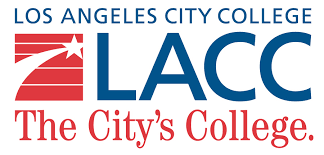

#Inference About Two Population: Standard Deviations
#Created by Professor: Edward Pineda-Castro
#Los Angeles City College

# <center>Classical and P-value Method of Hypothesis Testing Regarding Two Population: Standard Deviations</center>

**Example 1:** A researcher wants to know whether students who do not plan to apply for financial aid had more variability on the SAT math test than those who do plan to do so.  She obtains a random sample of 35 students who do not plan to apply for financial aid and a random sample of 38 students who do plan to apply for financial aid and obtains the following results.

Do students who do not plan to apply for financial aid have a higher standard deviation on the SAT math exam than students who plan to apply for financial aid at the $\alpha$ = 0.01 level of significance?  SAT math exam scores are known to be normally distributed.

**Step 1: Hypotheses:**

**Ho:σ_dont=σ_do  vs H1:σ_dont>σ_do**




**Step 2: test statistic:**

In [ ]:
samplestdev1 = 123.1

samplestdev2 = 119.4

F = (samplestdev1**2) / (samplestdev2**2)

print(F)



1.0629368225830436


**Step 3: Classical Approach (Traditional):**






In [ ]:
from scipy.stats import f

dfdont = 35 - 1
dfdo = 38 - 1
alpha = 0.01

crit_val = f.ppf(1 - alpha, dfdont, dfdo)

print(crit_val)


2.205993404121427



**Step 4: P-value Approach:**








In [ ]:
from scipy.stats import f

Pv = 1 - f.cdf(1.063, dfdont, dfdo)

print(Pv)


0.42646415027291396


**Step 5: Conclusion in context:**

**There is not enough evidence to support the claim that students who do not plan to apply for financial aid have a higher standard deviation on the SAT math exam than students who plan to apply for financial aid at the  α  = 0.01 level**

---



**Practice 1:**  A quality control engineer wants to find out whether a new machine that fills bottles with liquid has less variability than the machine currently in use.  The engineer calibrates each machine to fill bottles with 16 ounces of a liquid.  After running each machine for 5 hours, she randomly selects 15 filled bottles from each machine and measures their contents.  She obtains the following results.

| Old Machine | New Machine |
|-------------|-------------|
| 16.01       | 16.02       |
| 16.04       | 15.96       |
| 15.96       | 16.05       |
| 16.00       | 15.95       |
| 16.07       | 15.99       |
| 15.89       | 16.02       |
| 16.04       | 16.00       |
| 16.05       | 15.97       |
| 15.91       | 16.03       |
| 16.10       | 16.06       |
| 16.01       | 16.05       |
| 16.00       | 15.94       |
| 15.92       | 16.08       |
| 16.16       | 15.96       |
| 15.92       | 15.95       |


Test the claim that the standard deviation of fill in the new machine is less than the standard deviation of fill in the old machine at the $\alpha$=0.05 level of significance.  Note:  Normal probability plots indicate the data are normally distributed.

**1. State the Hypothesis:**


**Ho:σ_old=σ_new vs H1:σ_old>σ_new**

**Step 2: test statistic:**

In [ ]:
import statistics
data_old = np.array([16.01, 16.04, 15.96, 16.00, 16.07, 15.89, 16.04, 16.05, 15.91, 16.10, 16.01, 16.00, 15.92, 16.16, 15.92])
data_new = np.array([16.02, 15.96, 16.05, 15.95, 15.99, 16.02, 16.00, 15.97, 16.03, 16.06, 16.05, 15.94, 16.08, 15.96, 15.95])

s1 = statistics.stdev(data_old)
s2 = statistics.stdev(data_new)

F = s1**2/s2**2

print(F)


NameError: name 'np' is not defined

**Step 3: Classical Approach (Traditional):**

In [ ]:
from scipy.stats import f

df1 = len(data_old) - 1
df2 = len(data_new) - 1
alpha = 0.05

crit_val = f.ppf(1-
alpha, df1, df2)

print(crit_val)

2.483725741128222


**Step 4: P-value Approach:**

In [ ]:
from scipy.stats import f

p_value = 1 - f.cdf(F, df1, df2)

print(p_value)

0.03484246268468594


**Step 5: Conclusion in context:**

**There is enough evidence to support the claim that the old machine have a higher standard deviation than the new machine.**

# <center>Hypothesis Test Function for Regarding Two Population: Standard Deviation without Data</center>

In [ ]:
from scipy.stats import f

def hypothesis_test_std_dev(samplestdev1, samplesize1, samplestdev2, samplesize2, alpha=0.01, tails="right", decimal_places=2):
    # Calculate the degrees of freedom for the two samples
    df1 = samplesize1 - 1
    df2 = samplesize2 - 1

    # Calculate the F-value (test statistic) based on the sample standard deviations
    F = (samplestdev1**2) / (samplestdev2**2)

    # Calculate the critical value from the F-distribution
    if tails == "right":
        crit_val = f.ppf(1 - alpha, dfn=df1, dfd=df2)
    elif tails == "left":
        crit_val = f.ppf(alpha, dfn=df1, dfd=df2)
    elif tails == "two":
        crit_val_left = f.ppf(alpha / 2, dfn=df1, dfd=df2)
        crit_val_right = f.ppf(1 - alpha / 2, dfn=df1, dfd=df2)

    # Calculate the p-value
    if tails == "right":
        p_value = 1 - f.cdf(F, dfn=df1, dfd=df2)
    elif tails == "left":
        p_value = f.cdf(F, dfn=df1, dfd=df2)
    elif tails == "two":
        p_value = 2 * min(f.cdf(F, dfn=df1, dfd=df2), 1 - f.cdf(F, dfn=df1, dfd=df2))

    # Round the results
    F = round(F, decimal_places)
    crit_val = round(crit_val, decimal_places)
    p_value = round(p_value, decimal_places)

    # Display the results
    print("Test statistic (F-value): {}".format(F))
    print("Critical value: {}".format(crit_val))
    print("P-value: {}".format(p_value))

    if tails == "two":
        if F < crit_val_left or F > crit_val_right:
            print("Reject the null hypothesis: There is a significant difference in standard deviations.")
        else:
            print("Do not reject the null hypothesis: There is no significant difference in standard deviations.")
    elif tails == "left":
        if F < crit_val:
            print("Reject the null hypothesis: There is a significant difference in standard deviations.")
        else:
            print("Do not reject the null hypothesis: There is no significant difference in standard deviations.")
    elif tails == "right":
        if F > crit_val:
            print("Reject the null hypothesis: There is a significant difference in standard deviations.")
        else:
            print("Do not reject the null hypothesis: There is no significant difference in standard deviations.")



#Enter your values into the function:

In [ ]:
# "left" for one-tailed left, "right" for one-tailed right, "two" for two-tailed
hypothesis_test_std_dev(samplestdev1=123.1, samplesize1=35, samplestdev2=119.4, samplesize2=38, alpha=0.01, tails="right", decimal_places=4)


Test statistic (F-value): 1.0629
Critical value: 2.206
P-value: 0.4265
Do not reject the null hypothesis: There is no significant difference in standard deviations.


# <center>Hypothesis Test Function for Regarding Two Population: Standard Deviation with Data</center>

In [ ]:
import numpy as np
from scipy.stats import f

def hypothesis_test_std_dev(data1, data2, alpha=0.05, tails="right", decimal_places=2):
    # Calculate the degrees of freedom for the two samples
    df1 = len(data1) - 1
    df2 = len(data2) - 1

    # Calculate the sample standard deviations
    samplestdev_1 = np.std(data1, ddof=1)
    samplestdev_2 = np.std(data2, ddof=1)

    # Calculate the F-value (test statistic) based on the sample standard deviations
    F = (samplestdev_1**2) / (samplestdev_2**2)

    # Calculate the critical value from the F-distribution
    if tails == "right":
        crit_val = f.ppf(1 - alpha, dfn=df1, dfd=df2)
    elif tails == "left":
        crit_val = f.ppf(alpha, dfn=df1, dfd=df2)
    elif tails == "two":
        crit_val_left = f.ppf(alpha / 2, dfn=df1, dfd=df2)
        crit_val_right = f.ppf(1 - alpha / 2, dfn=df1, dfd=df2)

    # Calculate the p-value
    if tails == "right":
        p_value = 1 - f.cdf(F, dfn=df1, dfd=df2)
    elif tails == "left":
        p_value = f.cdf(F, dfn=df1, dfd=df2)
    elif tails == "two":
        p_value = 2 * min(f.cdf(F, dfn=df1, dfd=df2), 1 - f.cdf(F, dfn=df1, dfd=df2))

    # Round the results
    F = round(F, decimal_places)
    crit_val = round(crit_val, decimal_places)
    p_value = round(p_value, decimal_places)

    # Display the results
    print("Test statistic (F-value): {}".format(F))
    print("Critical value: {}".format(crit_val))
    print("P-value: {}".format(p_value))

    if tails == "two":
        if F < crit_val_left or F > crit_val_right:
            print("Reject the null hypothesis: There is a significant difference in standard deviations.")
        else:
            print("Do not reject the null hypothesis: There is no significant difference in standard deviations.")
    elif tails == "left":
        if F < crit_val:
            print("Reject the null hypothesis: There is a significant difference in standard deviations.")
        else:
            print("Do not reject the null hypothesis: There is no significant difference in standard deviations.")
    elif tails == "right":
        if F > crit_val:
            print("Reject the null hypothesis: There is a significant difference in standard deviations.")
        else:
            print("Do not reject the null hypothesis: There is no significant difference in standard deviations.")


#Enter your values into the function:

In [ ]:
data_old = np.array([16.01, 16.04, 15.96, 16.00, 16.07, 15.89, 16.04, 16.05, 15.91, 16.10, 16.01, 16.00, 15.92, 16.16, 15.92])
data_new = np.array([16.02, 15.96, 16.05, 15.95, 15.99, 16.02, 16.00, 15.97, 16.03, 16.06, 16.05, 15.94, 16.08, 15.96, 15.95])
hypothesis_test_std_dev(data1=data_old, data2=data_new, alpha=0.05, tails="right", decimal_places=3)


Test statistic (F-value): 2.737
Critical value: 2.484
P-value: 0.035
Reject the null hypothesis: There is a significant difference in standard deviations.
